In [1]:
!pip install wordcloud

In [3]:
!pip install mlxtend

In [4]:
import pandas as pd


In [5]:
data = pd.read_csv('C:/Users/LENOVO/Downloads/GroceryStoreDataSet.csv' , names = ['products'])

In [6]:
df = data


In [7]:
data

,products
0,"MILK,BREAD,BISCUIT"
1,"BREAD,MILK,BISCUIT,CORNFLAKES"
2,"BREAD,TEA,BOURNVITA"
3,"JAM,MAGGI,BREAD,MILK"
4,"MAGGI,TEA,BISCUIT"
5,"BREAD,TEA,BOURNVITA"
6,"MAGGI,TEA,CORNFLAKES"
7,"MAGGI,BREAD,TEA,BISCUIT"
8,"JAM,MAGGI,BREAD,TEA"
9,"BREAD,MILK"


In [8]:
data.columns

Index(['products'], dtype='object')

In [9]:
data.values

array([['MILK,BREAD,BISCUIT'],
       ['BREAD,MILK,BISCUIT,CORNFLAKES'],
       ['BREAD,TEA,BOURNVITA'],
       ['JAM,MAGGI,BREAD,MILK'],
       ['MAGGI,TEA,BISCUIT'],
       ['BREAD,TEA,BOURNVITA'],
       ['MAGGI,TEA,CORNFLAKES'],
       ['MAGGI,BREAD,TEA,BISCUIT'],
       ['JAM,MAGGI,BREAD,TEA'],
       ['BREAD,MILK'],
       ['COFFEE,COCK,BISCUIT,CORNFLAKES'],
       ['COFFEE,COCK,BISCUIT,CORNFLAKES'],
       ['COFFEE,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,COCK'],
       ['BREAD,SUGER,BISCUIT'],
       ['COFFEE,SUGER,CORNFLAKES'],
       ['BREAD,SUGER,BOURNVITA'],
       ['BREAD,COFFEE,SUGER'],
       ['BREAD,COFFEE,SUGER'],
       ['TEA,MILK,COFFEE,CORNFLAKES']], dtype=object)

In [10]:
data = list(df['products'] . apply(lambda x:x.split(',')))
data

[['MILK', 'BREAD', 'BISCUIT'],
 ['BREAD', 'MILK', 'BISCUIT', 'CORNFLAKES'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['JAM', 'MAGGI', 'BREAD', 'MILK'],
 ['MAGGI', 'TEA', 'BISCUIT'],
 ['BREAD', 'TEA', 'BOURNVITA'],
 ['MAGGI', 'TEA', 'CORNFLAKES'],
 ['MAGGI', 'BREAD', 'TEA', 'BISCUIT'],
 ['JAM', 'MAGGI', 'BREAD', 'TEA'],
 ['BREAD', 'MILK'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'COCK', 'BISCUIT', 'CORNFLAKES'],
 ['COFFEE', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'COCK'],
 ['BREAD', 'SUGER', 'BISCUIT'],
 ['COFFEE', 'SUGER', 'CORNFLAKES'],
 ['BREAD', 'SUGER', 'BOURNVITA'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['BREAD', 'COFFEE', 'SUGER'],
 ['TEA', 'MILK', 'COFFEE', 'CORNFLAKES']]

In [11]:
from mlxtend.preprocessing import TransactionEncoder

In [12]:
te = TransactionEncoder()

In [13]:

te_data = te.fit(data).transform(data)
df = pd.DataFrame(te_data,columns = te.columns_)
df

,BISCUIT,BOURNVITA,BREAD,COCK,COFFEE,CORNFLAKES,JAM,MAGGI,MILK,SUGER,TEA
0,True,False,True,False,False,False,False,False,True,False,False
1,True,False,True,False,False,True,False,False,True,False,False
2,False,True,True,False,False,False,False,False,False,False,True
3,False,False,True,False,False,False,True,True,True,False,False
4,True,False,False,False,False,False,False,True,False,False,True
5,False,True,True,False,False,False,False,False,False,False,True
6,False,False,False,False,False,True,False,True,False,False,True
7,True,False,True,False,False,False,False,True,False,False,True
8,False,False,True,False,False,False,True,True,False,False,True
9,False,False,True,False,False,False,False,False,True,False,False


In [14]:
from mlxtend.frequent_patterns import apriori

In [15]:
df1 = apriori(df,min_support = 0.01,use_colnames = True)
df1

,support,itemsets
0,0.35,(BISCUIT)
1,0.20,(BOURNVITA)
2,0.65,(BREAD)
3,0.15,(COCK)
4,0.40,(COFFEE)
...,...,...
78,0.05,"(BISCUIT, BREAD, TEA, MAGGI)"
79,0.10,"(BISCUIT, CORNFLAKES, COFFEE, COCK)"
80,0.05,"(BREAD, MILK, JAM, MAGGI)"
81,0.05,"(TEA, BREAD, JAM, MAGGI)"


In [16]:
df1.sort_values(by = 'support',ascending = False)

,support,itemsets
2,0.65,(BREAD)
4,0.40,(COFFEE)
0,0.35,(BISCUIT)
10,0.35,(TEA)
5,0.30,(CORNFLAKES)
...,...,...
55,0.05,"(BISCUIT, MILK, CORNFLAKES)"
57,0.05,"(BREAD, BOURNVITA, SUGER)"
17,0.05,"(BISCUIT, SUGER)"
37,0.05,"(CORNFLAKES, MAGGI)"


In [17]:
df1['length'] = df1['itemsets'].apply(lambda x:len(x))
df1

,support,itemsets,length
0,0.35,(BISCUIT),1
1,0.20,(BOURNVITA),1
2,0.65,(BREAD),1
3,0.15,(COCK),1
4,0.40,(COFFEE),1
...,...,...,...
78,0.05,"(BISCUIT, BREAD, TEA, MAGGI)",4
79,0.10,"(BISCUIT, CORNFLAKES, COFFEE, COCK)",4
80,0.05,"(BREAD, MILK, JAM, MAGGI)",4
81,0.05,"(TEA, BREAD, JAM, MAGGI)",4


In [18]:
df1[(df1['length']==2) & (df1['support']>=0.05)]

,support,itemsets,length
11,0.20,"(BISCUIT, BREAD)",2
12,0.10,"(BISCUIT, COCK)",2
13,0.10,"(BISCUIT, COFFEE)",2
14,0.15,"(BISCUIT, CORNFLAKES)",2
15,0.10,"(BISCUIT, MAGGI)",2
16,0.10,"(BISCUIT, MILK)",2
17,0.05,"(BISCUIT, SUGER)",2
18,0.10,"(BISCUIT, TEA)",2
19,0.15,"(BREAD, BOURNVITA)",2
20,0.05,"(COFFEE, BOURNVITA)",2


C:\Users\LENOVO\anaconda3\lib\site-packages\seaborn\rcmod.py:82: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  if LooseVersion(mpl.__version__) >= "3.0":
C:\Users\LENOVO\anaconda3\lib\site-packages\setuptools\_distutils\version.py:346: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:499: DeprecationWarning: ROTATE_90 is deprecated and will be removed in Pillow 10 (2023-07-01). Use Transpose.ROTATE_90 instead.
  orientation = Image.ROTATE_90
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:508: DeprecationWarning: textsize is deprecated and will be removed in Pillow 10 (2023-07-01). Use textbbox or textlength instead.
  box_size = draw.textsize(word, font=transposed_font)
C:\Users\LENOVO\anaconda3\lib\site-packages\wordcloud\wordcloud.py:520: DeprecationWarning: ROTATE_90 is deprec

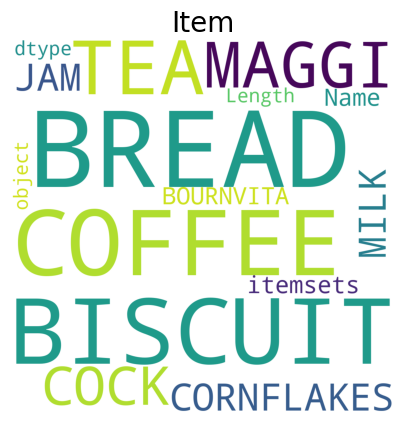

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

from wordcloud import WordCloud

plt.rcParams['figure.figsize'] = (12,5)
wordcloud = WordCloud(background_color = 'white',width= 1200,height = 1200,max_words=121).generate(str(df1['itemsets']))
plt.imshow(wordcloud)
plt.axis('off')
plt.axis('off')
plt.title('Item',fontsize = 20)
plt.show()